# DECOMPOSIÇÃO LU

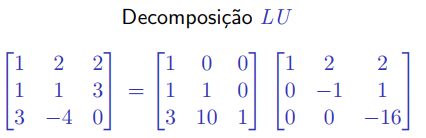

In [ ]:
from sympy import *
import numpy as np
from sympy import*

In [122]:
def decom_LU(A):
    n = len(A[0])

    L = np.zeros((n, n))
    U = np.copy(A)  
    
    for j in range(0,n):  
        L[j, j] = 1
        for i in range(j+1,n): 
            L[i,j] = U[i,j]/U[j,j]  # mij
            for k in range(j+1,n):  
                U[i,k] = U[i,k] - L[i,j]*U[j,k] #Li - mij*Lx-1
                U[i,j] = 0   
    return L, U

A = np.array([[1,  2, 2],
              [1,  1, 3],
              [3, -4, 0]])

L, U = decom_LU(A)
print("L:")
display(Matrix(L))
print("U:")
display(Matrix(U))


L:


Matrix([
[1.0,    0,   0],
[1.0,  1.0,   0],
[3.0, 10.0, 1.0]])

U:


Matrix([
[1,  2,   2],
[0, -1,   1],
[0,  0, -16]])

# ALGORITMO DE THOMAS
A matriz tem que ser diagonal

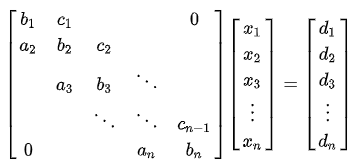

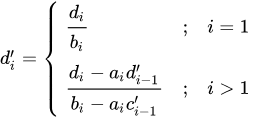

In [123]:
import numpy as np

def thomas(A):
    n = len(A)
    a = np.zeros(n)
    b = np.zeros(n)
    c = np.zeros(n)
    d = np.zeros(n)
    
    
    b[0] = A[0][0]
    c[0] = A[0][1]
    d[0] = A[0][-1]
    
    for i in range(1, n-1):
        a[i] = A[i][i-1]
        b[i] = A[i][i]
        c[i] = A[i][i+1]
        d[i] = A[i][-1]

    a[-1] = A[-1][-3]
    b[-1] = A[-1][-2]
    c[-1] = A[-1][-1]

    den = float(b[0])
    c[0] /= den
    d[0] /= den
    
    for i in range(1,n):
        den = float(b[i]-a[i]*c[i-1])
        c[i] /= den
        d[i] = (d[i]-a[i]*d[i])/den
        
    x = np.copy(d)
    for i in range(n-2, -1, -1):
        x[i] -=c[i]*x[i+1]

    
    for i in range(len(x)):
        print("x", i+1, "=", round(x[i],4))
        

A = [[2, -1, 0, 0, 0],
     [-1, 2, -1, 0, 0],
     [0, -1, 2, -1, 0],
     [0, 0, -1, 2, -1],
     [0, 0, 0, -1, 2]]

B = [4, 2, 1, 5, 3]
matrix_aumentada = np.concatenate((Matrix(A),Matrix(B)), axis=1)
thomas(matrix_aumentada)

x 1 = 5.8333
x 2 = 7.6667
x 3 = 7.5
x 4 = 8.0
x 5 = 0.0


# Gauss Seidel

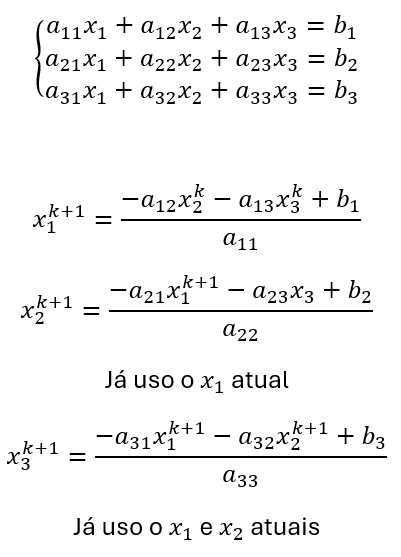

In [124]:
def gaussSeidel(A, B, epsilon, MAXITER):
    size = np.shape(A)
    n = size[0]
    m = size[1]

    X = np.zeros(n)
    diff = np.ones(n, dtype=float)
    erro = 2*epsilon

    iter = 0
    while (epsilon <= erro or iter<MAXITER):
        for i in range(0,n,1):
            soma = 0 
            for j in range(0,m,1):
                if (i!=j): 
                    soma = soma-A[i,j]*X[j]
            
            x = (B[i]+soma)/A[i,i]
            diff[i] = np.abs(x-X[i])
            X[i] = x
        erro = np.max(diff)
        iter = iter + 1

    X = np.transpose([X])


    return X
    
A = np.array([[4,  -1,  2],
              [-2,  6,  4],
              [2,  1,  36]])

b = np.array([4, 2, 1])

epsilon = 0.0001
maxINT = 100


X = gaussSeidel(A , b, epsilon, maxINT)
print('X: ')
display(Matrix(X))


X: 


Matrix([
[   1.22702702702703],
[  0.783783783783784],
[-0.0621621621621622]])

# Interpolação de Lagrange
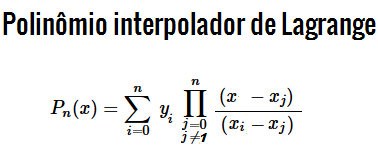
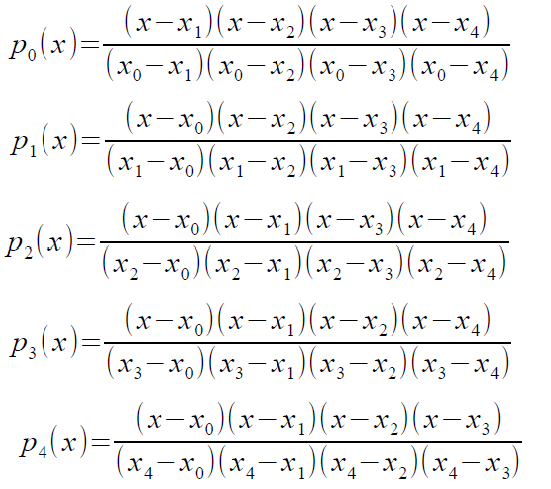

In [125]:
def lagrange(xp, x, y, grau):
    yp = 0
    for k in range(0,n+1):
        p = 1
        for j in range(0,n+1):
            if k!=j:
                p = p*(xp-x[j])/(x[k]-x[j])
        yp = yp+p*y[k]
    return yp
        


x = [1, 2, 3, 4, 5]
y = [4, 1,-1, 2, 5]
n = 4
xp = 1.5

y = lagrange(xp, x, y, n)
y

2.9765625